<a href="https://colab.research.google.com/github/RitwikSharma107/linear-regression-in-depth/blob/main/GRIP_TSF_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**
## **(Graduate Rotational Internship Program)** 

### Author:
## **RITWIK SHARMA**
### (Data Science and Business Analytics Intern)
<ul>
 <li><a href="https://www.linkedin.com/in/ritwik-sharma-156951167/">LinkedIn Profile</a></li>
 <li><a href="https://github.com/RitwikSharma107">Github Profile</a></li>
 <li><a href="https://ritwiksharma107.github.io/portfolio/">Portfolio</a></li>
</ul>

# Task 1: Prediction using Supervised ML

## Problem Definition

In this regression task, predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## Data

The link for the data is given below:

http://bit.ly/w-data

### Import necessary libraries

In [154]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stat
import pylab

# Getting matplotlib graphs with dark background
plt.style.use('dark_background')

## Data Analysis

### Read data from remote link

In [155]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [156]:
df.shape

(25, 2)

There are 25 rows and 2 columns.

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are only two columns:-
* Hours (Independent Variable)
* Scores in percentage (Dependent Variable)

### Check for missing values

In [158]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values.

### Data Visualization

In [159]:
px.scatter(df, x='Hours', y='Scores', title='Hours vs Percentage', template='plotly_dark')

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Check whether feature(Hours) is guassian or normal distributed

Many machine learning algorithms work better when features are on a relatively similar scale and close to normal distribution.
<br><br>

#### Q-Q plot
(Quantile-Quantile plots)

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight.

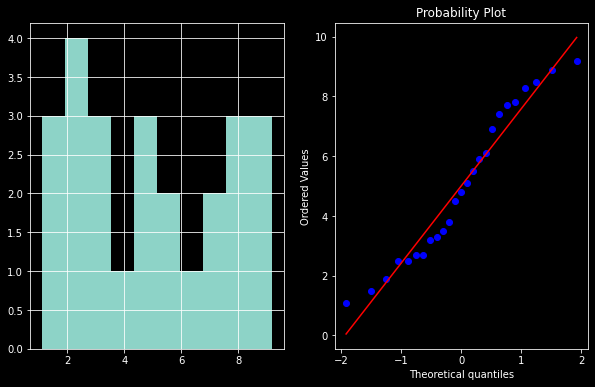

In [160]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

plot_data(df,'Hours')

Yes the feature(Hours) is normally distributed. 

Therfore, the machine learning algorithm will perform better.

## Data Modeling

### Preparing the data by splitting it into feature(X) and label(y)

In [161]:
y = df['Scores']
X = df.drop('Scores',axis=1)

### Split the feature and label into training and testing data

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

### Visualize training and testing data

In [163]:
fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
])
fig.update_layout(xaxis_title="Hours", yaxis_title="Percentage", title='Hours vs Percentage', template='plotly_dark')
fig.show()

# Linear Regression
**Linear regression** performs the task to predict a dependent variable value (y) based on a given independent variable (x).

So, this regression technique finds out a linear relationship between x (input) and y(output) and the regression line is the best fit line for that relationship.
<br><br>

**Hypothesis function for Linear Regression:** y = m*X +c

where,

y : Dependent variable

X : Independent variable

When training the model – it fits the best line to predict the value of y for a given value of x. The model gets the best regression fit line by finding the best m and c values.

c : intercept

m : coefficient of x

How to update θ1 and θ2 values to get the best fit line ?

**Cost Function (J)**

Cost function(J) of Linear Regression is the Root Mean Squared Error (RMSE) between predicted y value (pred) and true y value (y).

By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum.
<br><br>
**Gradient Descent**

Gradient descent is an optimization algorithm used to minimize cost function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient towards global minima.
<br><br>

**Cost Func J(W) VS W (m|Slope)**

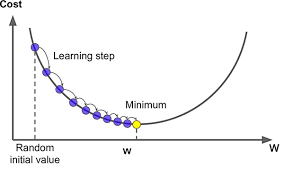

### Instantiate the Linear Regressor


In [164]:
lin_reg = LinearRegression()

### Fit the model

In [165]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the best fit regression line

In [166]:
# Equation of best fit line
line = lin_reg.coef_*X + lin_reg.intercept_

fig = go.Figure([
    go.Scatter(x=X.squeeze(), y=y.squeeze(), name='Data', mode='markers'),
    go.Scatter(x=X.squeeze(), y=line.squeeze(), name='Best fit line')
])
fig.update_layout(xaxis_title="Hours", yaxis_title="Percentage", title='Hours vs Percentage', template='plotly_dark')
fig.show()

### Check for overfitting

In [167]:
print(f"Training Score: {lin_reg.score(X_train,y_train)*100:.2f} %")
print(f"Testing Score: {lin_reg.score(X_test,y_test)*100:.2f} %")

Training Score: 94.85 %
Testing Score: 95.68 %


The scores are very close which indicates that we have avoided over-fitting

### Comparing Actual and Predicted Values

In [168]:
# Calculate predictions
y_preds = lin_reg.predict(X_test)

# Make another dataframe to store actual and predicted values
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds}) 
df_check

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


### Model Evaluation

In [169]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_preds, squared=True)}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test,y_preds, squared=False)}")
print(f"R^2: {r2_score(y_test,y_preds)*100:.2f} %")

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144
R^2: 95.68 %


### Prediction on New Data

In [170]:
hours = 9.25
own_pred = lin_reg.predict([[hours]])
print(f'A student who will study for {hours} hours will get {own_pred[0]:.2f} %')

A student who will study for 9.25 hours will get 92.92 %
